In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing, SARIMAX
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [60]:
df = pd.read_csv('Data/SuperStore_raw.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.00000000,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37000000,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.00000000,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94000000,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81000000,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59000000,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.00000000,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32000000,California,Paper,2011,North America,40


In [61]:
le = LabelEncoder()
df['CityID'] = le.fit_transform(df['City'])
df['StateID'] = le.fit_transform(df['State'])
df['LocationID'] = df[['StateID', 'CityID']].apply(lambda x: f"L-{str(x['StateID'])}-{str(x['CityID'])}" , axis=1)

df['Product'] = le.fit_transform(df['Product.Name'])
df['Sub'] = le.fit_transform(df['Sub.Category'])
df['ProductID'] = df[['Product', 'Sub']].apply(lambda x: f"P-{str(x['Product'])}-{str(x['Sub'])}" , axis=1)
df.drop(['CityID', 'StateID', 'Product', 'Sub'], axis=1, inplace=True)
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,LocationID,ProductID
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.00000000,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,2011-01-09 00:00:00.000,Second Class,4.37000000,California,Paper,2011,North America,2,L-192-1910,P-3736-12
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.00000000,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,2011-01-26 00:00:00.000,Standard Class,0.94000000,California,Paper,2011,North America,4,L-192-1910,P-3569-12
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,2011-08-09 00:00:00.000,Standard Class,1.81000000,California,Paper,2011,North America,32,L-192-1910,P-175-12
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,2011-08-09 00:00:00.000,Standard Class,4.59000000,California,Paper,2011,North America,32,L-192-1910,P-3612-12
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.00000000,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,2011-10-03 00:00:00.000,Standard Class,1.32000000,California,Paper,2011,North America,40,L-192-1910,P-3734-12


In [62]:
df.drop(['记录数','Year', 'Ship.Date', 'Market2', 'weeknum', 'Product.ID'], axis=1, inplace=True)
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Region,Row.ID,Sales,Segment,Ship.Mode,Shipping.Cost,State,Sub.Category,LocationID,ProductID
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.00000000,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,West,36624,19,Consumer,Second Class,4.37000000,California,Paper,L-192-1910,P-3736-12
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.00000000,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,West,37033,19,Consumer,Standard Class,0.94000000,California,Paper,L-192-1910,P-3569-12
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,West,31468,21,Consumer,Standard Class,1.81000000,California,Paper,L-192-1910,P-175-12
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,West,31469,111,Consumer,Standard Class,4.59000000,California,Paper,L-192-1910,P-3612-12
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.00000000,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,West,32440,6,Consumer,Standard Class,1.32000000,California,Paper,L-192-1910,P-3734-12


In [63]:
for i in df.columns:
    if '.' in i:
        df.rename(columns={i: i.replace('.', '')}, inplace=True)
df.head()

,Category,City,Country,CustomerID,CustomerName,Discount,Market,OrderDate,OrderID,OrderPriority,...,Region,RowID,Sales,Segment,ShipMode,ShippingCost,State,SubCategory,LocationID,ProductID
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.00000000,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,West,36624,19,Consumer,Second Class,4.37000000,California,Paper,L-192-1910,P-3736-12
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.00000000,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,West,37033,19,Consumer,Standard Class,0.94000000,California,Paper,L-192-1910,P-3569-12
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,West,31468,21,Consumer,Standard Class,1.81000000,California,Paper,L-192-1910,P-175-12
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,West,31469,111,Consumer,Standard Class,4.59000000,California,Paper,L-192-1910,P-3612-12
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.00000000,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,West,32440,6,Consumer,Standard Class,1.32000000,California,Paper,L-192-1910,P-3734-12


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       51290 non-null  object 
 1   City           51290 non-null  object 
 2   Country        51290 non-null  object 
 3   CustomerID     51290 non-null  object 
 4   CustomerName   51290 non-null  object 
 5   Discount       51290 non-null  float64
 6   Market         51290 non-null  object 
 7   OrderDate      51290 non-null  object 
 8   OrderID        51290 non-null  object 
 9   OrderPriority  51290 non-null  object 
 10  ProductName    51290 non-null  object 
 11  Profit         51290 non-null  float64
 12  Quantity       51290 non-null  int64  
 13  Region         51290 non-null  object 
 14  RowID          51290 non-null  int64  
 15  Sales          51290 non-null  int64  
 16  Segment        51290 non-null  object 
 17  ShipMode       51290 non-null  object 
 18  Shippi

In [65]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.head()

,Category,City,Country,CustomerID,CustomerName,Discount,Market,OrderDate,OrderID,OrderPriority,...,Region,RowID,Sales,Segment,ShipMode,ShippingCost,State,SubCategory,LocationID,ProductID
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.00000000,US,2011-01-07,CA-2011-130813,High,...,West,36624,19,Consumer,Second Class,4.37000000,California,Paper,L-192-1910,P-3736-12
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.00000000,US,2011-01-21,CA-2011-148614,Medium,...,West,37033,19,Consumer,Standard Class,0.94000000,California,Paper,L-192-1910,P-3569-12
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05,CA-2011-118962,Medium,...,West,31468,21,Consumer,Standard Class,1.81000000,California,Paper,L-192-1910,P-175-12
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.00000000,US,2011-08-05,CA-2011-118962,Medium,...,West,31469,111,Consumer,Standard Class,4.59000000,California,Paper,L-192-1910,P-3612-12
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.00000000,US,2011-09-29,CA-2011-146969,High,...,West,32440,6,Consumer,Standard Class,1.32000000,California,Paper,L-192-1910,P-3734-12


C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


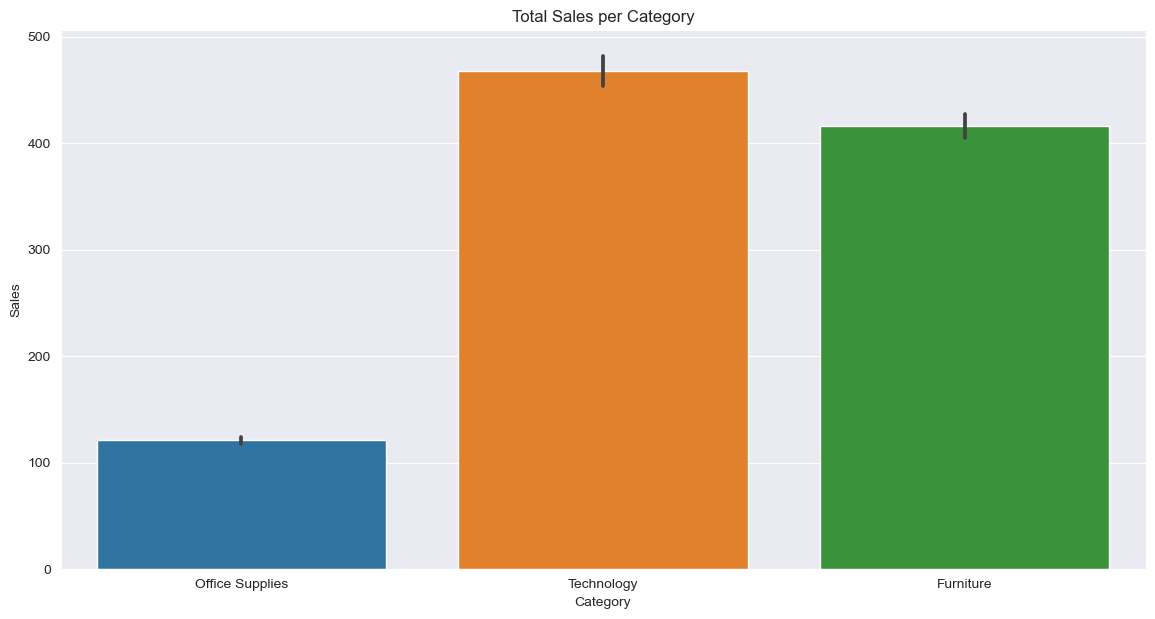

In [66]:
def total_sale_each_category(df):
    plt.figure(figsize=(14,7))
    plt.title("Total Sales per Category")
    sns.barplot(data=df, y='Sales', x='Category')
    plt.show()
total_sale_each_category(df)

<Figure size 1400x700 with 0 Axes>

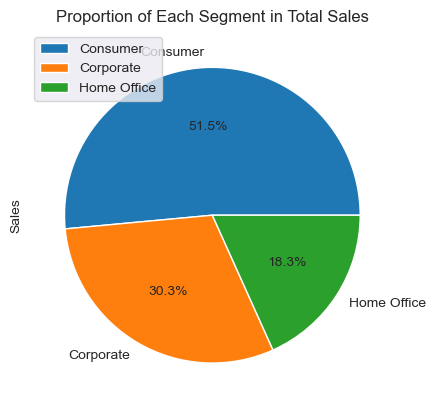

In [67]:
proportion_of_customer_segment_df = df.groupby(['Segment']).agg({'Sales':'sum'})
def proportion_of_customer_segment(data):
    plt.figure(figsize=(14, 7))
    data.plot(y='Sales',kind='pie', autopct='%1.1f%%')
    plt.title('Proportion of Each Segment in Total Sales')
    plt.show()
proportion_of_customer_segment(proportion_of_customer_segment_df)

C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Zuylele\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


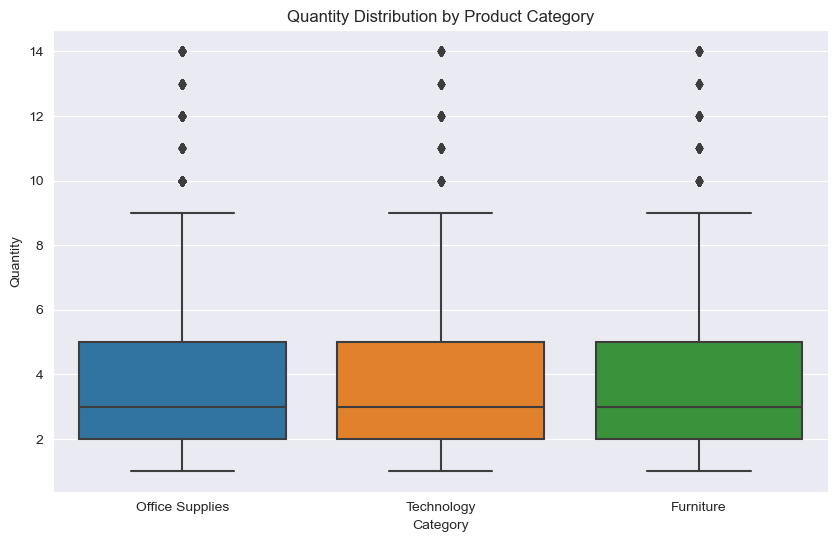

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Quantity')
plt.title('Quantity Distribution by Product Category')
plt.show()

# Forcasting sale using time series model

In [69]:
time_series_sales_df = df[['OrderDate', 'Sales']].set_index('OrderDate').resample('D').sum().resample('W').mean()
time_series_sales_df.head()

,Sales
OrderDate,
2011-01-02,561.00000000
2011-01-09,3690.00000000
2011-01-16,3882.14285714
2011-01-23,3113.71428571
2011-01-30,2190.85714286


### Visulization data

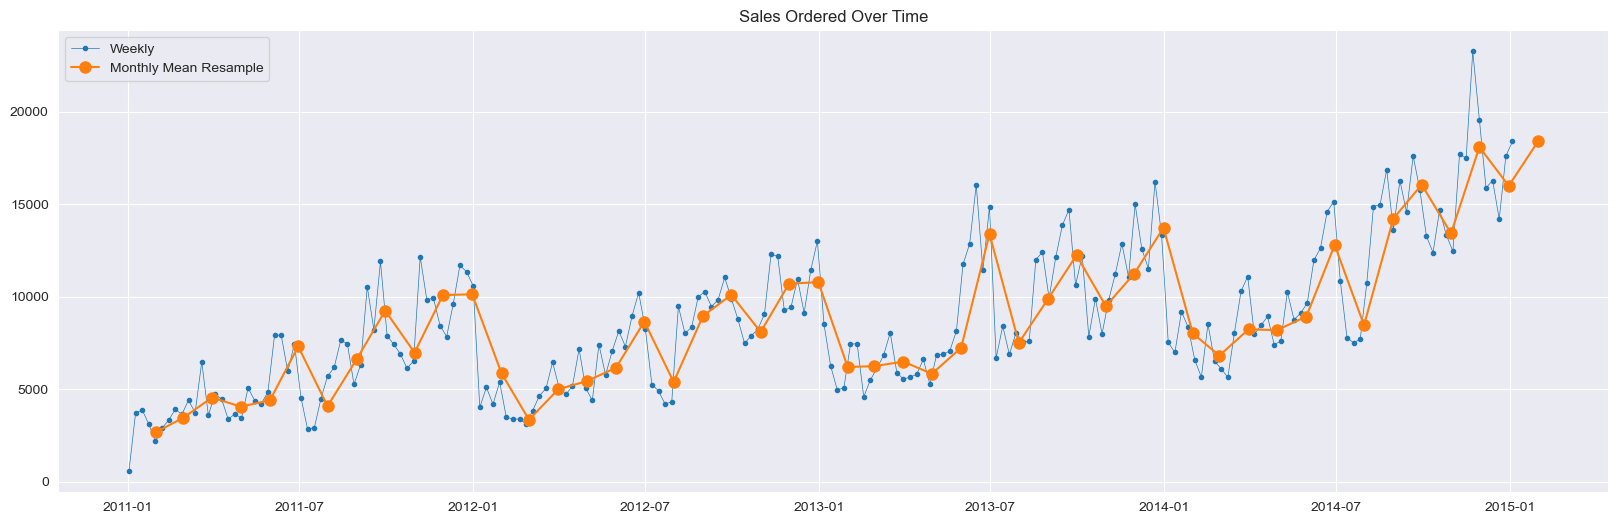

In [70]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(time_series_sales_df,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(time_series_sales_df.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
plt.title('Sales Ordered Over Time')
plt.legend()
plt.show()

### Decomposing data

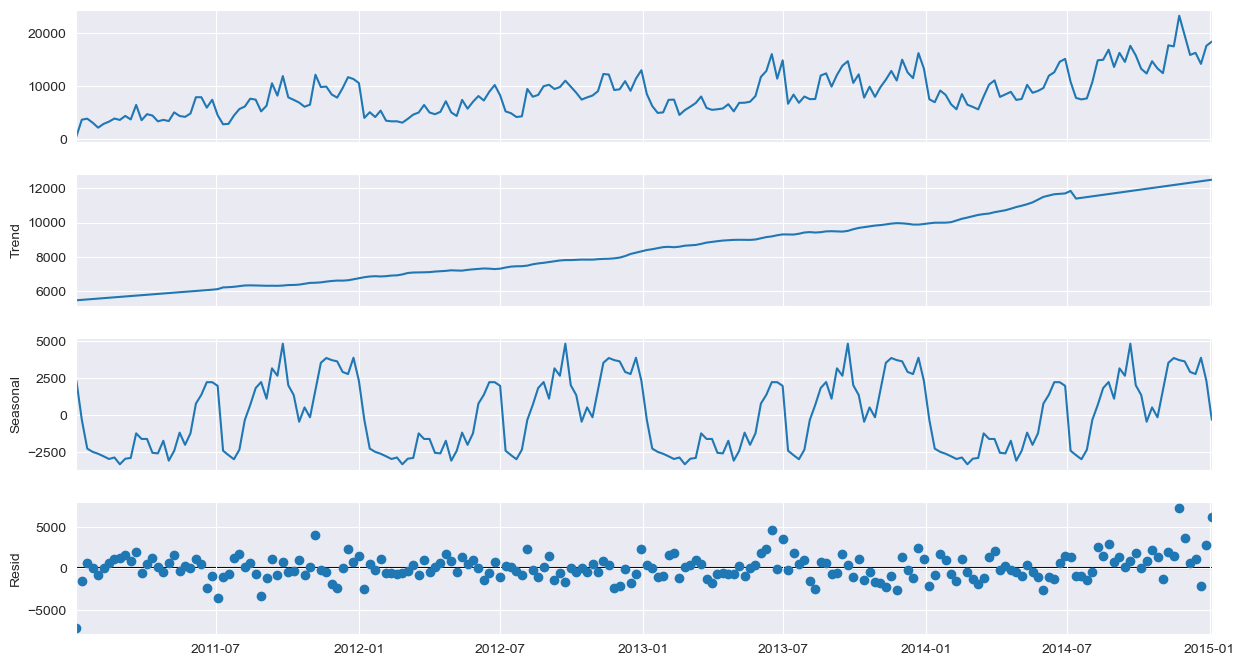

In [71]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(time_series_sales_df)

### Checking stationarity (Using graph)

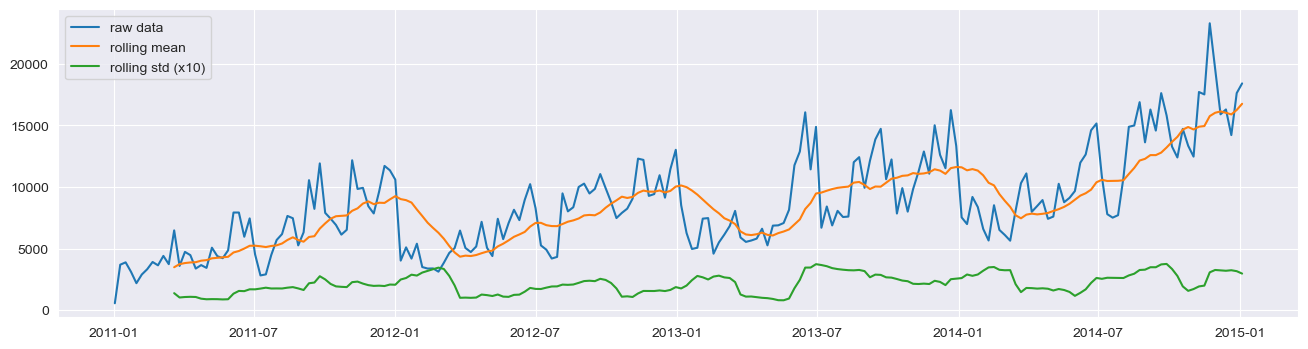

In [72]:

def test_stationarity(timeseries, title):
    
    rolmean = timeseries.rolling(window=12).mean() 
    rolstd = timeseries.rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4)) 
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean')
    ax.plot(rolstd, label='rolling std (x10)')
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(time_series_sales_df,'raw data')


### Checking stationarity (Using Augment Dickey-Fuller Test)

In [73]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
        
ADF_test(time_series_sales_df,'raw data')

 > Is the raw data stationary ?
Test statistic = -0.900
P-value = 0.788
Critical values :
	1%: -3.464337030867007 - The data is not stationary with 99% confidence
	5%: -2.876478799035722 - The data is not stationary with 95% confidence
	10%: -2.574733103221565 - The data is not stationary with 90% confidence


### Making Data Stationary (Using a combination of differencing and detrending)

 > Is the de-trended data stationary ?
Test statistic = -4.118
P-value = 0.001
Critical values :
	1%: -3.466598080268425 - The data is  stationary with 99% confidence
	5%: -2.8774669520682674 - The data is  stationary with 95% confidence
	10%: -2.5752604356654425 - The data is  stationary with 90% confidence


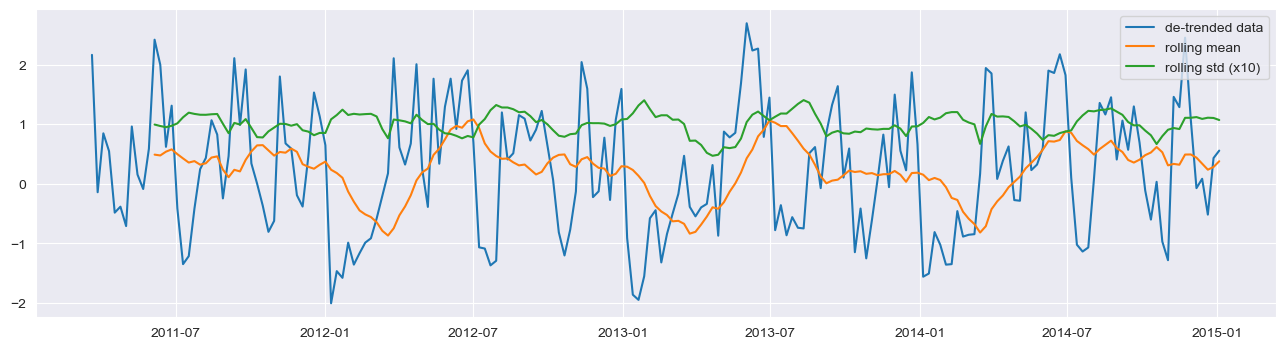

In [74]:
time_series_sales_df_detrend = (time_series_sales_df - time_series_sales_df.rolling(window=12).mean())/time_series_sales_df.rolling(window=12).std()
test_stationarity(time_series_sales_df_detrend,'de-trended data')
ADF_test(time_series_sales_df_detrend,'de-trended data')

### Split train/test set

In [75]:
time_series_sales_train_df = time_series_sales_df[: pd.to_datetime('2014-06-01')]
time_series_sales_test_df = time_series_sales_df[ pd.to_datetime('2014-06-01'):]
predict_date = len(time_series_sales_df) - len(time_series_sales_df[:pd.to_datetime('2014-06-01')]) +1

### Simple Exponential Smoothing

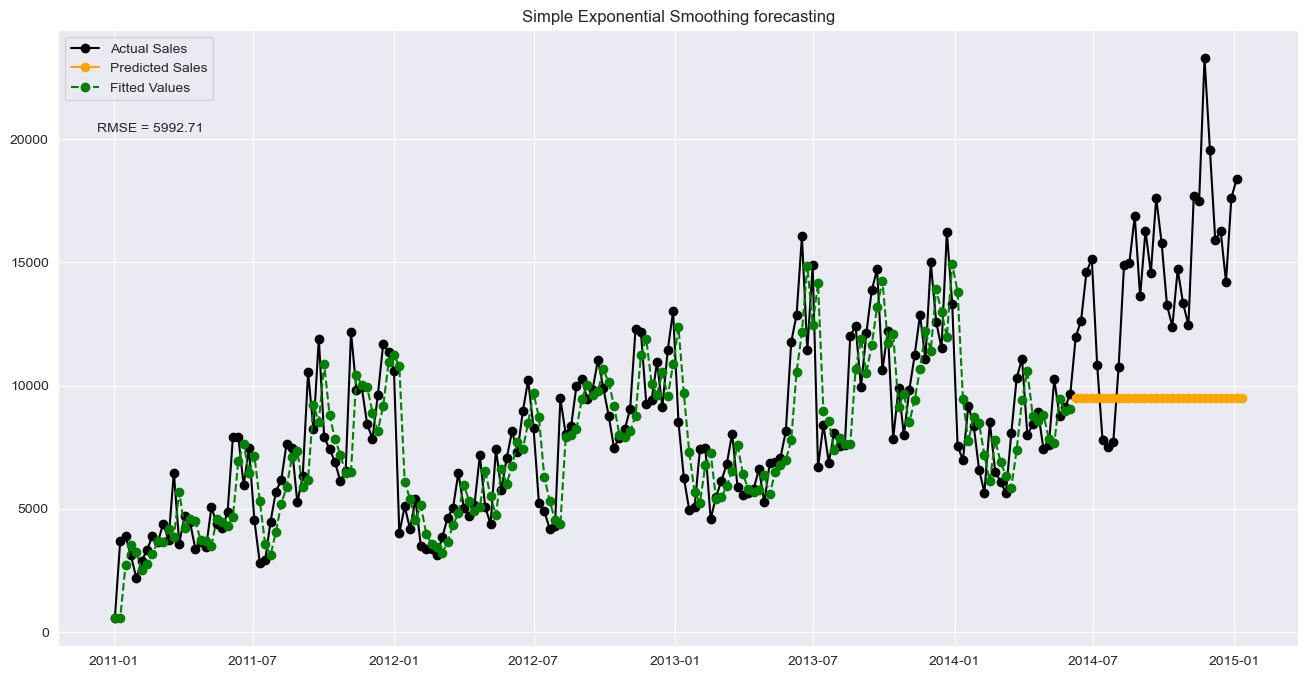

In [76]:
SEM_model = SimpleExpSmoothing(endog = time_series_sales_train_df).fit()
SEM_forecast = SEM_model.forecast(predict_date).rename('SEM Predicted Sales')
SEM_rmse_value = root_mean_squared_error(SEM_forecast, time_series_sales_test_df['Sales'])
plt.figure(figsize=(16, 8))
x_position = time_series_sales_df.index[1]  # X-coordinate (last date in your data)
y_position = time_series_sales_df['Sales'].max()-1000  # Y-coordinate (maximum sales value)
x_text = x_position - pd.DateOffset(days=30)  # X-coordinate for the text label (adjust as needed)
y_text = y_position - 2000
plt.annotate(f'RMSE = {SEM_rmse_value:.2f}', xy=(x_position, y_position), xytext=(x_text, y_text))
plt.plot(time_series_sales_df.index, time_series_sales_df['Sales'], marker='o', color='black', label='Actual Sales')
plt.plot(SEM_forecast.index, SEM_forecast, marker='o', color='orange', label='Predicted Sales')
plt.plot(SEM_model.fittedvalues.index, SEM_model.fittedvalues, marker='o', color='green', linestyle='dashed', label='Fitted Values')
plt.title("Simple Exponential Smoothing forecasting")
plt.legend()
plt.show()

### Holt

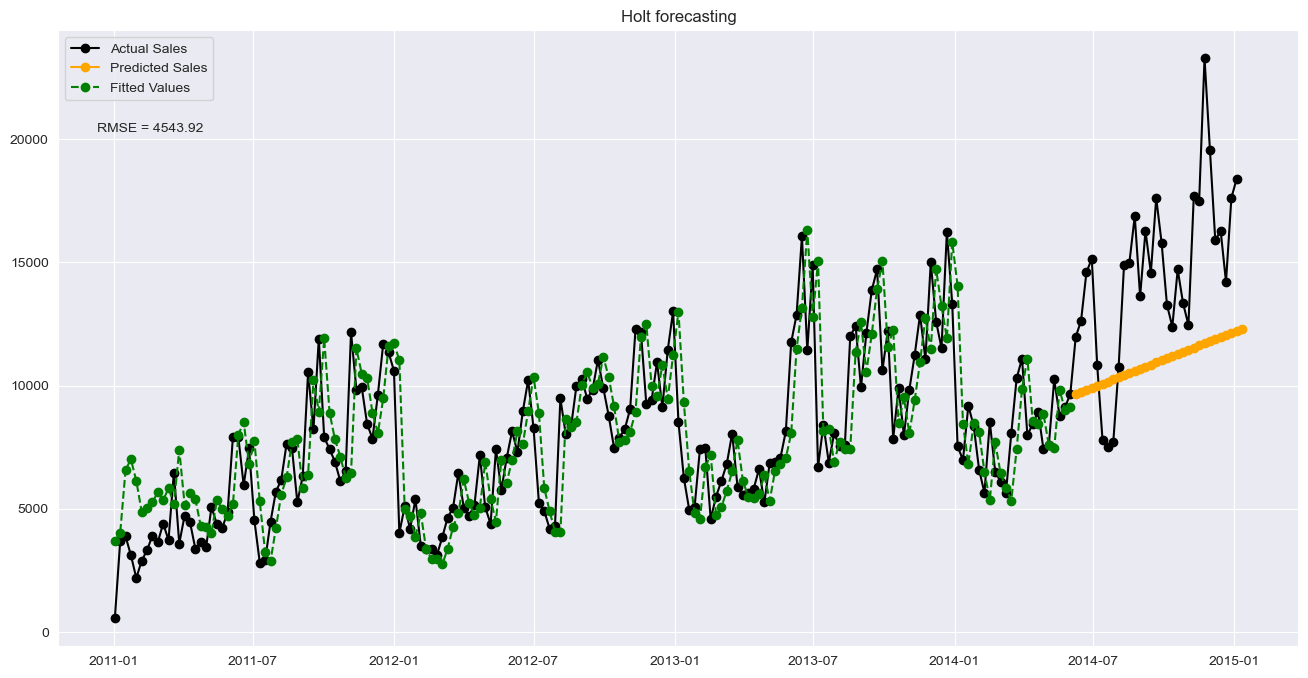

In [77]:
Holt_model = Holt(time_series_sales_train_df).fit()
Holt_forecast = Holt_model.forecast(predict_date).rename('Holt Predicted Sales')
Holt_rmse_value = root_mean_squared_error(Holt_forecast, time_series_sales_test_df['Sales'])
plt.figure(figsize=(16, 8))
x_position = time_series_sales_df.index[1]  # X-coordinate (last date in your data)
y_position = time_series_sales_df['Sales'].max()-1000  # Y-coordinate (maximum sales value)
x_text = x_position - pd.DateOffset(days=30)  # X-coordinate for the text label (adjust as needed)
y_text = y_position - 2000
plt.annotate(f'RMSE = {Holt_rmse_value:.2f}', xy=(x_position, y_position), xytext=(x_text, y_text))
plt.plot(time_series_sales_df.index, time_series_sales_df['Sales'], marker='o', color='black', label='Actual Sales')
plt.plot(Holt_forecast.index, Holt_forecast, marker='o', color='orange', label='Predicted Sales')
plt.plot(Holt_model.fittedvalues.index, Holt_model.fittedvalues, marker='o', color='green', linestyle='dashed', label='Fitted Values')
plt.title("Holt forecasting")
plt.legend()
plt.show()

### Holt's winter

C:\Users\Zuylele\miniconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


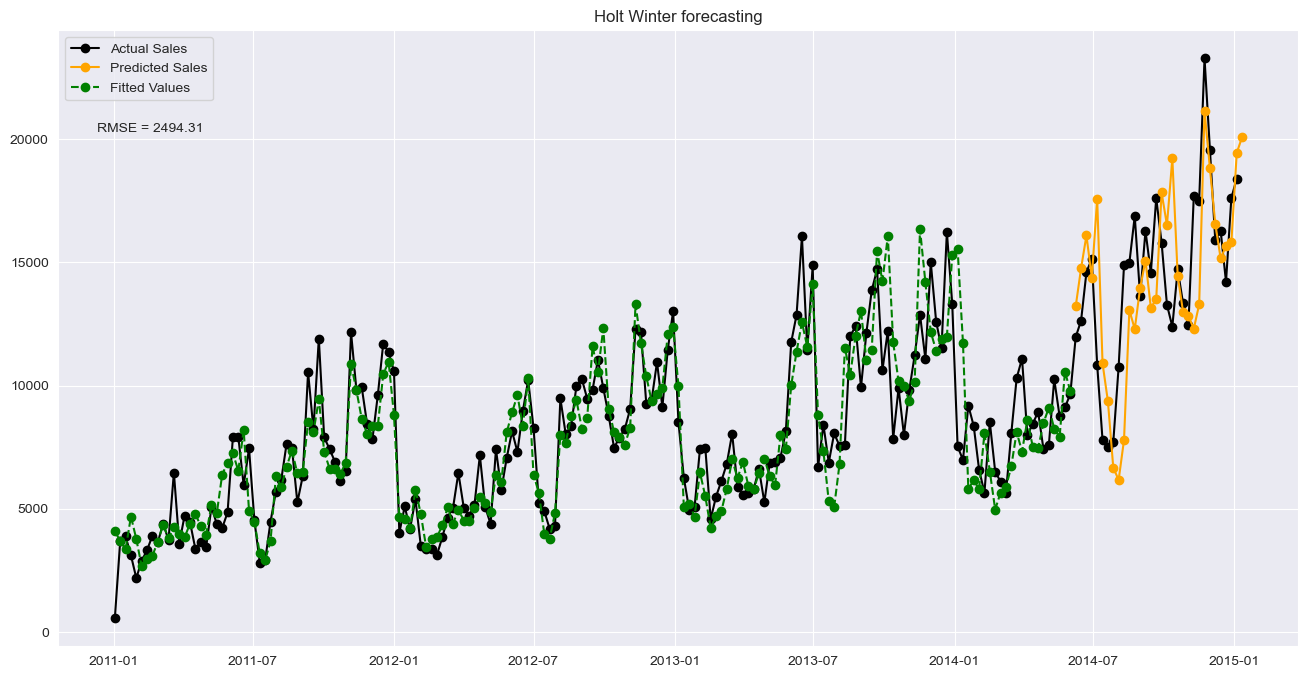

In [78]:
season_period = len(time_series_sales_train_df[pd.to_datetime('2012-01-01'):pd.to_datetime('2012-12-31')])

Holt_winter_model = ExponentialSmoothing(time_series_sales_train_df, seasonal_periods=season_period,trend='mul', seasonal='mul',damped_trend=True).fit()
Holt_winter_forecast = Holt_winter_model.forecast(predict_date).rename('Holts-winter Predicted Sales')
Holt_winter_rmse_value = root_mean_squared_error(Holt_winter_forecast, time_series_sales_test_df['Sales'])
plt.figure(figsize=(16, 8))
x_position = time_series_sales_df.index[1]  # X-coordinate (last date in your data)
y_position = time_series_sales_df['Sales'].max()-1000  # Y-coordinate (maximum sales value)
x_text = x_position - pd.DateOffset(days=30)  # X-coordinate for the text label (adjust as needed)
y_text = y_position - 2000
plt.annotate(f'RMSE = {Holt_winter_rmse_value:.2f}', xy=(x_position, y_position), xytext=(x_text, y_text))
plt.plot(time_series_sales_df.index, time_series_sales_df['Sales'], marker='o', color='black', label='Actual Sales')
plt.plot(Holt_winter_forecast.index, Holt_winter_forecast, marker='o', color='orange', label='Predicted Sales')
plt.plot(Holt_winter_model.fittedvalues.index,Holt_winter_model.fittedvalues, marker='o', color='green', linestyle='dashed', label='Fitted Values')
plt.title("Holt Winter forecasting")
plt.legend()
plt.show()

C:\Users\Zuylele\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Zuylele\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


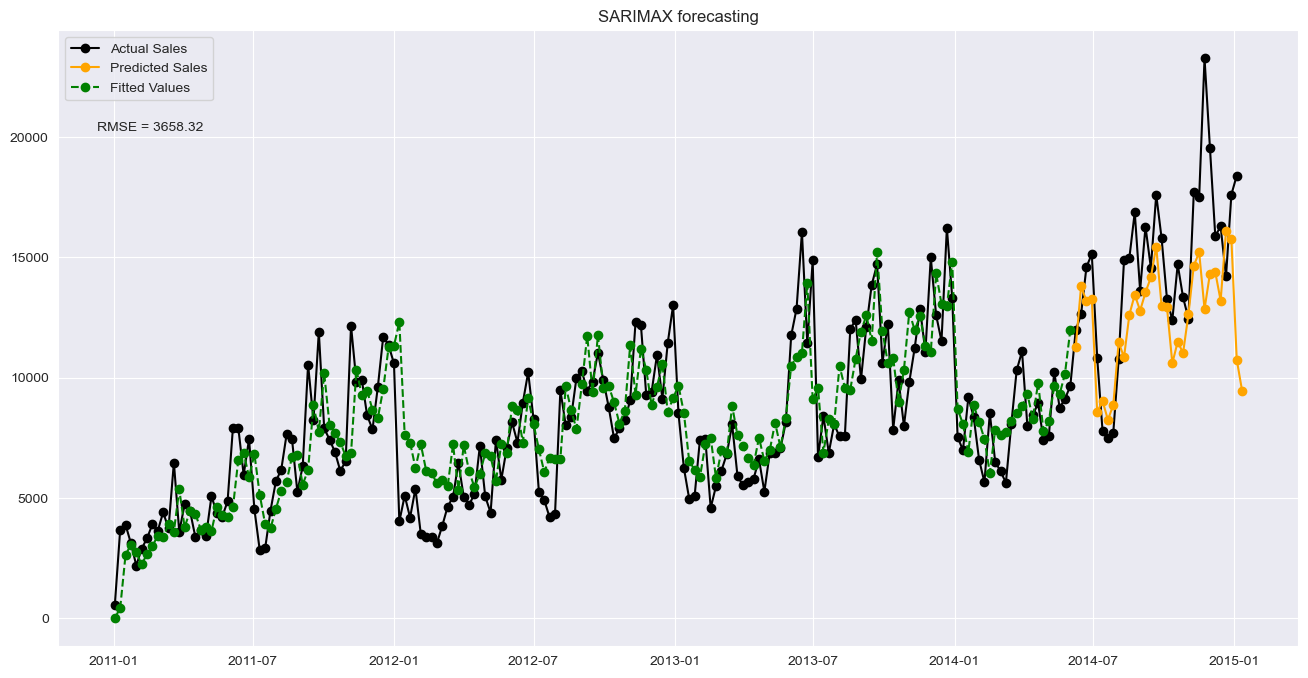

In [79]:
sarimax_model=sm.tsa.statespace.SARIMAX(time_series_sales_train_df,order=(1, 1, 1),seasonal_order=(1,1,1,52)).fit()
sarimax_forecast = sarimax_model.forecast(predict_date).rename('SARIMAX Predicted Sales')
sarimax_rmse_value = root_mean_squared_error(sarimax_forecast, time_series_sales_test_df['Sales'])
plt.figure(figsize=(16, 8))
x_position = time_series_sales_df.index[1]  # X-coordinate (last date in your data)
y_position = time_series_sales_df['Sales'].max()-1000  # Y-coordinate (maximum sales value)
x_text = x_position - pd.DateOffset(days=30)  # X-coordinate for the text label (adjust as needed)
y_text = y_position - 2000
plt.annotate(f'RMSE = {sarimax_rmse_value:.2f}', xy=(x_position, y_position), xytext=(x_text, y_text))
plt.plot(time_series_sales_df.index, time_series_sales_df['Sales'], marker='o', color='black', label='Actual Sales')
plt.plot(sarimax_forecast.index, sarimax_forecast, marker='o', color='orange', label='Predicted Sales')
plt.plot(sarimax_model.fittedvalues.index,sarimax_model.fittedvalues, marker='o', color='green', linestyle='dashed', label='Fitted Values')
plt.title("SARIMAX forecasting")
plt.legend()
plt.show()

In [80]:
time_series_predict_df = time_series_sales_df.copy()
time_series_predict_df  = pd.concat([ time_series_predict_df, pd.concat([SEM_model.fittedvalues, SEM_forecast]).rename('SEM-Predicted-Sales')], axis=1)
time_series_predict_df  = pd.concat([ time_series_predict_df, pd.concat([Holt_model.fittedvalues, Holt_forecast]).rename('Holt-Predicted-Sales')], axis=1)
time_series_predict_df  = pd.concat([ time_series_predict_df, pd.concat([Holt_winter_model.fittedvalues, Holt_winter_forecast]).rename('Holt-Winter-Predicted-Sales')], axis=1)
time_series_predict_df  = pd.concat([ time_series_predict_df, pd.concat([sarimax_model.fittedvalues, sarimax_forecast]).rename('Sarimax-Predicted-Sales')], axis=1)
time_series_predict_df

,Sales,SEM-Predicted-Sales,Holt-Predicted-Sales,Holt-Winter-Predicted-Sales,Sarimax-Predicted-Sales
2011-01-02,561.00000000,561.00000000,3690.00000000,4089.82770643,0.00000000
2011-01-09,3690.00000000,561.00000000,4027.93851175,3703.30472106,430.72136288
2011-01-16,3882.14285714,2737.83802326,6587.75157430,3351.76857206,2650.31494115
2011-01-23,3113.71428571,3533.92823502,7006.69056304,4688.94900046,3045.93343763
2011-01-30,2190.85714286,3241.58636773,6134.98298668,3776.38328746,2745.54874753
...,...,...,...,...,...
2014-12-14,16285.28571429,9483.91068322,11970.63447481,15161.47807411,13203.24445058
2014-12-21,14206.85714286,9483.91068322,12056.67757107,15652.71678171,16091.01020134
2014-12-28,17611.28571429,9483.91068322,12142.72066732,15817.65879287,15776.68825898
2015-01-04,18399.00000000,9483.91068322,12228.76376357,19438.32380088,10751.85250673


In [81]:
time_series_predict_df.to_csv('Data/time_series_predict_df.csv', index_label='Month')

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Knn_df = df[['ShipMode', 'Sales', 'Profit', 'OrderPriority','Segment']]
le = LabelEncoder()
Knn_df['ShipModeCode'] = le.fit_transform(Knn_df['ShipMode'])
Knn_df['OrderPriorityCode'] = le.fit_transform(Knn_df['OrderPriority'])
Knn_df['SegmentCode'] = le.fit_transform(Knn_df['Segment'])
Knn_df.drop(['ShipMode', 'OrderPriority', 'Segment'], axis=1, inplace=True)
y = Knn_df['SegmentCode']
X = Knn_df.drop('SegmentCode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
pd.DataFrame(le.inverse_transform(predictions))
# X_test['ShipMode'] = pd.DataFrame(le.inverse_transform(X_test['ShipModeCode']))
# X_test['OrderPriority'] = pd.DataFrame(le.inverse_transform(X_test['OrderPriorityCode']))
final = pd.concat([pd.DataFrame(predictions), pd.DataFrame(list(y_test))], axis=1)
final = pd.concat([pd.DataFrame(final), pd.DataFrame(list(X_test))], axis=1)
final

C:\Users\Zuylele\AppData\Local\Temp\ipykernel_8468\2314651647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Knn_df['ShipModeCode'] = le.fit_transform(Knn_df['ShipMode'])
C:\Users\Zuylele\AppData\Local\Temp\ipykernel_8468\2314651647.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Knn_df['OrderPriorityCode'] = le.fit_transform(Knn_df['OrderPriority'])
C:\Users\Zuylele\AppData\Local\Temp\ipykernel_8468\2314651647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,0,0,0
0,0,0,Sales
1,0,1,Profit
2,0,1,ShipModeCode
3,0,0,OrderPriorityCode
4,0,1,NaN
...,...,...,...
10253,0,0,NaN
10254,0,0,NaN
10255,1,0,NaN
10256,0,0,NaN
